In [2]:
##### Time-frequency Analysis #####



In [3]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

def createRealWavelet(time,freq,fwhm):
  sinepart = np.cos(2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/fwhm**2)
  return sinepart*gauspart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


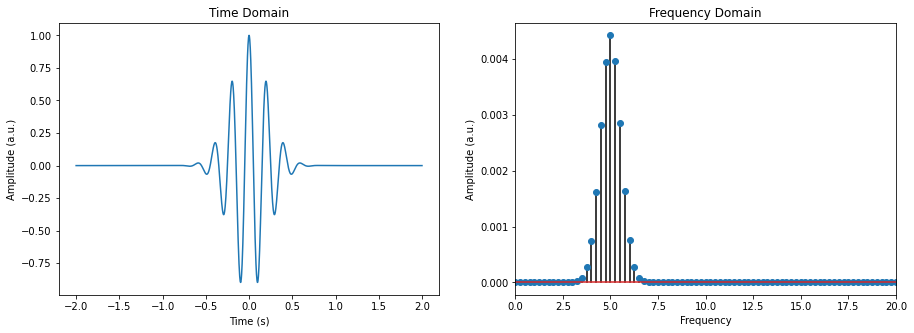

In [9]:
#parameters
freq  =  5  # Hz
srate =  500  # Hz
fwhm  =  0.5
time  =  np.arange(-2*srate,2*srate+1/srate)/srate
npnts = len(time)

#create our wavelet

wavelet = createRealWavelet(time,freq,fwhm)


#get the power spectrum of the wavelet

WaveletX = np.abs(np.fft.fft(wavelet/npnts))**2
hz = np.linspace(0,srate/2,int(npnts/2+1))

#create a figure with a 1x2 subplot geometry

fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(time,wavelet)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude (a.u.)")
ax[0].set_title("Time Domain")

ax[1].stem(hz,WaveletX[:len(hz)],'k')
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Amplitude (a.u.)")
ax[1].set_xlim([0,20])
ax[1].set_title("Frequency Domain")
plt.show()